# <center>Exploration and Analysis of Electric Vehicle Type Using Random Forest Classifier

## <center> TEAM : INFINITY
### <center> Balqis Dwian Fitri Zamzami
### <center> Mujadid Choirus Surya
### <center> Khoirul Amar Sidik

In [5]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

# sampling
from imblearn.under_sampling import NearMiss
from collections import Counter

# 1. Data pre-processing

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df1 = pd.read_csv("D:\.compfest\FINAL PROJECT\Electric_Vehicle_Population_Data.csv")
df3 = pd.read_csv("D:\.compfest\FINAL PROJECT\Electric_Vehicle_Title_and_Registration_Activity.csv")

### Dataset Electric Vehicle Population Data

In [8]:
df1.head(2)

VIN (1-10)  County     City State  Postal Code  Model Year  Make   Model  \
0  5UXTA6C03P    King  Seattle    WA      98177.0        2023   BMW      X5   
1  1FMCU0EZXN  Yakima    Moxee    WA      98936.0        2022  FORD  ESCAPE   

                    Electric Vehicle Type  \
0  Plug-in Hybrid Electric Vehicle (PHEV)   
1  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              30   
1           Clean Alternative Fuel Vehicle Eligible              38   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  36.0       218985539   
1          0                  15.0       197264322   

                                Vehicle Location  \
0  POINT (-122.38242499999996 47.77279000000004)   
1  POINT (-120.37951169999997 46.55609000000004)   

                               Electric Utility  2020 Census Tract  
0  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10  
1                                    PACIFICORP       5.307700e+10

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143596 entries, 0 to 143595
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         143596 non-null  object 
 1   County                                             143574 non-null  object 
 2   City                                               143574 non-null  object 
 3   State                                              143596 non-null  object 
 4   Postal Code                                        143574 non-null  float64
 5   Model Year                                         143596 non-null  int64  
 6   Make                                               143596 non-null  object 
 7   Model                                              143596 non-null  object 
 8   Electric Vehicle Type                              143596 non-null  object

In [10]:
cat = [i for i in df1.columns if df1[i].dtype == 'object']
num = [i for i in df1.columns if df1[i].dtype != 'object']

In [11]:
# statistika deskriptif data numerik
df1[num].describe().T

count          mean           std           min  \
Postal Code           143574.0  9.817521e+04  2.383169e+03  1.730000e+03   
Model Year            143596.0  2.019866e+03  3.016004e+00  1.997000e+03   
Electric Range        143596.0  7.049574e+01  9.712873e+01  0.000000e+00   
Base MSRP             143596.0  1.373387e+03  9.450068e+03  0.000000e+00   
Legislative District  143269.0  2.937175e+01  1.482390e+01  1.000000e+00   
DOL Vehicle ID        143596.0  2.092015e+08  8.353700e+07  4.385000e+03   
2020 Census Tract     143574.0  5.297590e+10  1.594040e+09  1.081042e+09   

                               25%           50%           75%           max  
Postal Code           9.805200e+04  9.812200e+04  9.837000e+04  9.940300e+04  
Model Year            2.018000e+03  2.021000e+03  2.022000e+03  2.024000e+03  
Electric Range        0.000000e+00  1.900000e+01  1.110000e+02  3.370000e+02  
Base MSRP             0.000000e+00  0.000000e+00  0.000000e+00  8.450000e+05  
Legislative District  1.800000e+01  3.300000e+01  4.300000e+01  4.900000e+01  
DOL Vehicle ID        1.668338e+08  2.111039e+08  2.364520e+08  4.792548e+08  
2020 Census Tract     5.303301e+10  5.303303e+10  5.305307e+10  5.603300e+10

In [12]:
# statistika deskriptif data kategorik
df1[cat].describe().T

count unique  \
VIN (1-10)                                         143596   9311   
County                                             143574    170   
City                                               143574    655   
State                                              143596     43   
Make                                               143596     37   
Model                                              143596    127   
Electric Vehicle Type                              143596      2   
Clean Alternative Fuel Vehicle (CAFV) Eligibility  143596      3   
Vehicle Location                                   143571    790   
Electric Utility                                   143574     76   

                                                                                                 top  \
VIN (1-10)                                                                                7SAYGDEE7P   
County                                                                                          King   
City                                                                                         Seattle   
State                                                                                             WA   
Make                                                                                           TESLA   
Model                                                                                        MODEL 3   
Electric Vehicle Type                                                 Battery Electric Vehicle (BEV)   
Clean Alternative Fuel Vehicle (CAFV) Eligibility  Eligibility unknown as battery range has not b...   
Vehicle Location                                                         POINT (-122.12302 47.67668)   
Electric Utility                                       PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)   

                                                     freq  
VIN (1-10)                                            652  
County                                              75383  
City                                                24662  
State                                              143269  
Make                                                65552  
Model                                               26766  
Electric Vehicle Type                              110865  
Clean Alternative Fuel Vehicle (CAFV) Eligibility   63954  
Vehicle Location                                     3689  
Electric Utility                                    52866

In [13]:
# DOL Vehicle ID adalah daat unik
df1['DOL Vehicle ID'].duplicated().sum()

0

### Dataset Electric Vehicle Title and Registration Activity (Kebutuhan Eksplorasi)

In [14]:
df3.head(2)

Clean Alternative Fuel Vehicle Type  VIN (1-10)  DOL Vehicle ID  Model Year  \
0      Battery Electric Vehicle (BEV)  1N4AZ0CPXF       121397454        2015   
1      Battery Electric Vehicle (BEV)  5YJ3E1EB6K       474790578        2019   

     Make    Model Vehicle Primary Use  Electric Range  Odometer Reading  \
0  NISSAN     Leaf           Passenger              84                 0   
1   TESLA  Model 3           Passenger             220                 0   

                                       Odometer Code New or Used Vehicle  \
0  Odometer reading is not collected at time of r...                Used   
1  Odometer reading is not collected at time of r...                Used   

   Sale Price Sale Date  Base MSRP      Transaction Type DOL Transaction Date  \
0           0       NaN          0  Registration Renewal    September 27 2022   
1           0       NaN          0  Registration Renewal     February 19 2021   

   Transaction Year County      City State of Residence  Postal Code  \
0              2022   King   SEATTLE                 WA      98125.0   
1              2021   King  BELLEVUE                 WA      98004.0   

        2015 HB 2778 Exemption Eligibility  \
0  HB 2778 Eligiblity Requirements not met   
1  HB 2778 Eligiblity Requirements not met   

  2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0           HB 2042 Eligibility Requirements not met               
1           HB 2042 Eligibility Requirements not met               

   Meets 2019 HB 2042 Electric Range Requirement  \
0                                           True   
1                                           True   

   Meets 2019 HB 2042 Sale Date Requirement  \
0                                     False   
1                                     False   

   Meets 2019 HB 2042 Sale Price/Value Requirement  \
0                                            False   
1                                            False   

  2019 HB 2042: Battery Range Requirement  \
0                                     NaN   
1                                     NaN   

  2019 HB 2042: Purchase Date Requirement  \
0      Non-sale, registration transaction   
1      Non-sale, registration transaction   

  2019 HB 2042: Sale Price/Value Requirement Electric Vehicle Fee Paid  \
0         Non-sale, registration transaction                       Yes   
1         Non-sale, registration transaction                       Yes   

  Transportation Electrification Fee Paid  \
0                                     Yes   
1                                     Yes   

  Hybrid Vehicle Electrification Fee Paid  2020 Census Tract  \
0                                      No       5.303300e+10   
1                                      No       5.303302e+10   

   Legislative District                               Electric Utility  
0                  46.0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  
1                  41.0  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)

In [15]:
df3['DOL Transaction Date'] = pd.to_datetime(df3['DOL Transaction Date'])
df3.head()

Clean Alternative Fuel Vehicle Type  VIN (1-10)  DOL Vehicle ID  Model Year  \
0      Battery Electric Vehicle (BEV)  1N4AZ0CPXF       121397454        2015   
1      Battery Electric Vehicle (BEV)  5YJ3E1EB6K       474790578        2019   
2      Battery Electric Vehicle (BEV)  5YJXCAE43G       119336136        2016   
3      Battery Electric Vehicle (BEV)  5YJXCAE43G       119336136        2016   
4      Battery Electric Vehicle (BEV)  5YJ3E1EB6K       474790578        2019   

     Make    Model Vehicle Primary Use  Electric Range  Odometer Reading  \
0  NISSAN     Leaf           Passenger              84                 0   
1   TESLA  Model 3           Passenger             220                 0   
2   TESLA  Model X           Passenger             200                 0   
3   TESLA  Model X           Passenger             200                 0   
4   TESLA  Model 3           Passenger             220                 0   

                                       Odometer Code New or Used Vehicle  \
0  Odometer reading is not collected at time of r...                Used   
1  Odometer reading is not collected at time of r...                Used   
2  Odometer reading is not collected at time of r...                Used   
3  Odometer reading is not collected at time of r...                Used   
4  Odometer reading is not collected at time of r...                Used   

   Sale Price Sale Date  Base MSRP      Transaction Type DOL Transaction Date  \
0           0       NaN          0  Registration Renewal           2022-09-27   
1           0       NaN          0  Registration Renewal           2021-02-19   
2           0       NaN          0  Registration Renewal           2020-03-02   
3           0       NaN          0  Registration Renewal           2021-02-19   
4           0       NaN          0  Registration Renewal           2023-02-13   

   Transaction Year County      City State of Residence  Postal Code  \
0              2022   King   SEATTLE                 WA      98125.0   
1              2021   King  BELLEVUE                 WA      98004.0   
2              2020   King  BELLEVUE                 WA      98004.0   
3              2021   King  BELLEVUE                 WA      98004.0   
4              2023   King  BELLEVUE                 WA      98004.0   

        2015 HB 2778 Exemption Eligibility  \
0  HB 2778 Eligiblity Requirements not met   
1  HB 2778 Eligiblity Requirements not met   
2  HB 2778 Eligiblity Requirements not met   
3  HB 2778 Eligiblity Requirements not met   
4  HB 2778 Eligiblity Requirements not met   

  2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0           HB 2042 Eligibility Requirements not met               
1           HB 2042 Eligibility Requirements not met               
2           HB 2042 Eligibility Requirements not met               
3           HB 2042 Eligibility Requirements not met               
4           HB 2042 Eligibility Requirements not met               

   Meets 2019 HB 2042 Electric Range Requirement  \
0                                           True   
1                                           True   
2                                           True   
3                                           True   
4                                           True   

   Meets 2019 HB 2042 Sale Date Requirement  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   Meets 2019 HB 2042 Sale Price/Value Requirement  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

  2019 HB 2042: Battery Range Requirement  \
0                            

In [16]:
df3['m/y'] = df3['DOL Transaction Date'].dt.strftime("%m-%Y")

In [17]:
df3.set_index('DOL Transaction Date', inplace=True)
df3.head()

Clean Alternative Fuel Vehicle Type  VIN (1-10)  \
DOL Transaction Date                                                   
2022-09-27                Battery Electric Vehicle (BEV)  1N4AZ0CPXF   
2021-02-19                Battery Electric Vehicle (BEV)  5YJ3E1EB6K   
2020-03-02                Battery Electric Vehicle (BEV)  5YJXCAE43G   
2021-02-19                Battery Electric Vehicle (BEV)  5YJXCAE43G   
2023-02-13                Battery Electric Vehicle (BEV)  5YJ3E1EB6K   

                      DOL Vehicle ID  Model Year    Make    Model  \
DOL Transaction Date                                                
2022-09-27                 121397454        2015  NISSAN     Leaf   
2021-02-19                 474790578        2019   TESLA  Model 3   
2020-03-02                 119336136        2016   TESLA  Model X   
2021-02-19                 119336136        2016   TESLA  Model X   
2023-02-13                 474790578        2019   TESLA  Model 3   

                     Vehicle Primary Use  Electric Range  Odometer Reading  \
DOL Transaction Date                                                         
2022-09-27                     Passenger              84                 0   
2021-02-19                     Passenger             220                 0   
2020-03-02                     Passenger             200                 0   
2021-02-19                     Passenger             200                 0   
2023-02-13                     Passenger             220                 0   

                                                          Odometer Code  \
DOL Transaction Date                                                      
2022-09-27            Odometer reading is not collected at time of r...   
2021-02-19            Odometer reading is not collected at time of r...   
2020-03-02            Odometer reading is not collected at time of r...   
2021-02-19            Odometer reading is not collected at time of r...   
2023-02-13            Odometer reading is not collected at time of r...   

                     New or Used Vehicle  Sale Price Sale Date  Base MSRP  \
DOL Transaction Date                                                        
2022-09-27                          Used           0       NaN          0   
2021-02-19                          Used           0       NaN          0   
2020-03-02                          Used           0       NaN          0   
2021-02-19                          Used           0       NaN          0   
2023-02-13                          Used           0       NaN          0   

                          Transaction Type  Transaction Year County      City  \
DOL Transaction Date                                                            
2022-09-27            Registration Renewal              2022   King   SEATTLE   
2021-02-19            Registration Renewal              2021   King  BELLEVUE   
2020-03-02            Registration Renewal              2020   King  BELLEVUE   
2021-02-19            Registration Renewal              2021   King  BELLEVUE   
2023-02-13            Registration Renewal              2023   King  BELLEVUE   

                     State of Residence  Postal Code  \
DOL Transaction Date                                   
2022-09-27                           WA      98125.0   
2021-02-19                           WA      98004.0   
2020-03-02                           WA      98004.0   
2021-02-19                           WA      98004.0   
2023-02-13                           WA      98004.0   

                           2015 HB 2778 Exemption Eligibility  \
DOL Transaction Date                                            
2022-09-27            HB 2778 Eligiblity Requirements not met   
2021-02-19            HB 2778 Eligiblity Requirements not met   
2020-03-02            HB 2778 Eligiblity Requirements not met   
2021-02-19            HB 2778 Eligiblity Requirements not met   
2023-02-13            HB 2778 Eligiblity Requirements not met   

  

# 2. Data cleaning


#### Handling Missing Data

In [18]:
df1.isnull().sum().sort_values(ascending = False)

Legislative District                                 327
Vehicle Location                                      25
2020 Census Tract                                     22
City                                                  22
Electric Utility                                      22
Postal Code                                           22
County                                                22
Electric Range                                         0
DOL Vehicle ID                                         0
Base MSRP                                              0
VIN (1-10)                                             0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Model                                                  0
Make                                                   0
Model Year                                             0
State                                                  0
Electric Vehicle Type                                  0
dtype: int64

In [19]:
df1_clean = df1.dropna()

In [20]:
df1_clean.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

#### Cek Duplicated Data

In [21]:
df1_clean.duplicated().any()

False

#### Rename Columns

In [22]:
df1_clean = df1_clean.rename(columns={'Postal Code': 'PostalCode', 'Model Year': 'ModelYear', 'Electric Vehicle Type': 'Electric_Vehicle_Type',
                        'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Eligibility',
                        'Electric Range':'Electric_Range', 'Base MSRP': 'Base_MSRP', 'Legislative District':'Legislative_District',
                        'DOL Vehicle ID': 'DOL_Vehicle_ID',
                        'Vehicle Location':'Vehicle_Location',
                        'Electric Utility':'Electric_Utility',
                        '2020 Census Tract':'2020_Census_Tract',
                        'VIN (1-10)':'VIN'})
print(df1_clean.columns)

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')


In [23]:
df1_clean.head()

VIN  County       City State  PostalCode  ModelYear       Make  \
0  5UXTA6C03P    King    Seattle    WA     98177.0       2023        BMW   
1  1FMCU0EZXN  Yakima      Moxee    WA     98936.0       2022       FORD   
2  1G1FW6S03J    King    Seattle    WA     98117.0       2018  CHEVROLET   
3  5YJSA1AC0D    King  Newcastle    WA     98059.0       2013      TESLA   
4  1FADP5CU8F  Kitsap  Bremerton    WA     98312.0       2015       FORD   

     Model                   Electric_Vehicle_Type  \
0       X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   ESCAPE  Plug-in Hybrid Electric Vehicle (PHEV)   
2  BOLT EV          Battery Electric Vehicle (BEV)   
3  MODEL S          Battery Electric Vehicle (BEV)   
4    C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   

                          CAFV_Eligibility  Electric_Range  Base_MSRP  \
0  Clean Alternative Fuel Vehicle Eligible              30          0   
1  Clean Alternative Fuel Vehicle Eligible              38          0   
2  Clean Alternative Fuel Vehicle Eligible             238          0   
3  Clean Alternative Fuel Vehicle Eligible             208      69900   
4    Not eligible due to low battery range              19          0   

   Legislative_District  DOL_Vehicle_ID  \
0                  36.0       218985539   
1                  15.0       197264322   
2                  36.0       168549727   
3                  41.0       244891062   
4                  26.0       134915000   

                                 Vehicle_Location  \
0   POINT (-122.38242499999996 47.77279000000004)   
1   POINT (-120.37951169999997 46.55609000000004)   
2  POINT (-122.37275999999997 47.689685000000054)   
3  POINT (-122.15733999999998 47.487175000000036)   
4                     POINT (-122.65223 47.57192)   

                                Electric_Utility  2020_Census_Tract  
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10  
1                                     PACIFICORP       5.307700e+10  
2   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10  
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
4                         PUGET SOUND ENERGY INC       5.303508e+10

# 3. Feature Engineering

##### Electric Utility Handling

In [24]:
df1_clean['Electric_Utility'].unique()

array(['CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 'PACIFICORP',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'PUGET SOUND ENERGY INC', 'NO KNOWN ELECTRIC UTILITY SERVICE',
       'PUD NO 1 OF PEND OREILLE COUNTY', 'PUD NO 1 OF CHELAN COUNTY',
       'AVISTA CORP', 'MODERN ELECTRIC WATER COMPANY',
       'CITY OF TACOMA - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF PORT ANGELES - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF RICHLAND - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF MASON COUNTY|PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF CENTRALIA - (WA)|CITY OF TACOMA - (WA)',
       'BONN

In [25]:
def categorize_electric_utility(value):
    if value == "Utility Not Avalilable":
        return "Not Available"
    elif "||" in value:
        return "Multi type Utilities"
    elif "|" in value:
        return "Single Type Utilities"
    else:
        return "Only One Option"



df1_clean['Electric_Utility_Category'] = df1_clean['Electric_Utility'].apply(categorize_electric_utility)

In [26]:
df1_clean['Electric_Utility_Category'].unique()

array(['Single Type Utilities', 'Only One Option', 'Multi type Utilities'],
      dtype=object)

In [27]:
df1_clean = df1_clean.drop('Electric_Utility', axis=1)

##### Update coloumn 'Electric Vehicle Type'

In [28]:
df1_clean['Electric_Vehicle_Type'] = df1_clean['Electric_Vehicle_Type'].apply(lambda x: \
                                                                x.replace('Plug-in Hybrid Electric Vehicle (PHEV)', 'PHEV')
                                                                .replace('Battery Electric Vehicle (BEV)', 'BEV'))

#### Menambah kolom latitude dan longitude berdasarkan kolom 'Vehicle Location'

In [29]:
# Mendefinisikan fungsi
def ekstrak_koor(point_string):
    coordinates = point_string.replace('POINT', '').replace('(', '').replace(')', '')
    longitude, latitude = coordinates.split()
    return float(longitude), float(latitude)

df1_clean[['Longitude', 'Latitude']] = df1_clean['Vehicle_Location'].apply(ekstrak_koor).apply(pd.Series)
df1_clean = df1_clean.drop('Vehicle_Location', axis=1)

#### Handling State Code

In [30]:
# Mendefinisikan fungsi state code
def state_map(state_code):
    state_map = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
        'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
        'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
        'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
        'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
        'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
        'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
        'WI': 'Wisconsin', 'WY': 'Wyoming'
    }

    return state_map.get(state_code, 'Unknown')

df1_clean['State'] = df1_clean['State'].apply(state_map)

#### Encoding

In [31]:
category = [i for i in df1_clean.columns if df1_clean[i].dtype == 'object']
category

['VIN',
 'County',
 'City',
 'State',
 'Make',
 'Model',
 'Electric_Vehicle_Type',
 'CAFV_Eligibility',
 'Electric_Utility_Category']

In [32]:
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

# mendefinisikan fungsi untuk encode data kategori menjadi angka
def encode_data(data, columns, method):

    # ordinal encoding
    if method == 'ordinal':
        ordinal_enc = OrdinalEncoder()
        encoded_columns = ordinal_enc.fit_transform(data[columns])
        data[columns] = encoded_columns
        data[columns] = encoded_columns.astype(int)

    # frequency encoding
    elif method == 'frequency':
        encoder = ce.CountEncoder(cols=columns)
        data = encoder.fit_transform(data)

    return data

In [33]:
# menentukan kolom ordinal dan frekuensi sebagai list
ordinal_columns = ['State', 'Make', 'Electric_Vehicle_Type', 'CAFV_Eligibility']
frequency_columns = ['VIN', 'County', 'City', 'Model', 'Electric_Utility_Category']

train = df1_clean.copy()

# menerapkan fungsi 'encode_data' ke 'ordinal_columns' dan 'frequency_columns'
train = encode_data(train, ordinal_columns, method='ordinal')
train = encode_data(train, frequency_columns, method='frequency')

train

VIN  County   City  State  PostalCode  ModelYear  Make  Model  \
0        35   75383  24662      0     98177.0       2023     4   1994   
1         6     782     27      0     98936.0       2022    10    319   
2        25   75383  24662      0     98117.0       2018     6   5593   
3         5   75383    754      0     98059.0       2013    31   7523   
4        21    4725    977      0     98312.0       2015    10   1534   
...     ...     ...    ...    ...         ...        ...   ...    ...   
143591   11   16429   4599      0     98021.0       2022     1    946   
143592   19   75383    283      0     98004.0       2022     7   2468   
143593   38   75383  24662      0     98104.0       2020     6   5593   
143594   14    3542   2121      0     99208.0       2014     6   4869   
143595   15   16429   4599      0     98021.0       2022    31   4994   

        Electric_Vehicle_Type  CAFV_Eligibility  Electric_Range  Base_MSRP  \
0                           1                 0              30          0   
1                           1                 0              38          0   
2                           0                 0             238          0   
3                           0                 0             208      69900   
4                           1                 2              19          0   
...                       ...               ...             ...        ...   
143591                      0                 1               0          0   
143592                      1                 0              32          0   
143593                      0                 0             259          0   
143594                      1                 0              38          0   
143595                      0                 1               0          0   

        Legislative_District  DOL_Vehicle_ID  2020_Census_Tract  \
0                       36.0       218985539       5.303300e+10   
1                       15.0       197264322       5.307700e+10   
2                       36.0       168549727       5.303300e+10   
3                       41.0       244891062       5.303303e+10   
4                       26.0       134915000       5.303508e+10   
...                      ...             ...                ...   
143591                   1.0       199194831       5.306105e+10   
143592                  48.0       193853824       5.303302e+10   
143593                  43.0       205856339       5.303301e+10   
143594                   6.0       346114492       5.306301e+10   
143595                   1.0       220266560       5.306105e+10   

        Electric_Utility_Category   Longitude   Latitude  
0                           26145 -122.382425  47.772790  
1                           32768 -120.379512  46.556090  
2                           26145 -122.372760  47.689685  
3                           84353 -122.157340  47.487175  
4                           32768 -122.652230  47.571920  
...                           ...         ...        ...  
143591                      32768 -122.179458  47.802589  
143592                      84353 -122.201905  47.613850  
143593                      26145 -122.329075  47.601800  
143594                      84353 -117.407250  47.718625  
143595                      32768 -122.179458  47.802589  

[143266 rows x 18 columns]

# 4. Exploratory Data Analysis

## Statistika Deskriptive

In [34]:
cat_clean = [i for i in df1_clean.columns if df1_clean[i].dtype == 'object']
num_clean = [i for i in df1_clean.columns if df1_clean[i].dtype != 'object']

In [35]:
df1_clean[cat_clean].describe().T

count unique  \
VIN                        143266   9303   
County                     143266     39   
City                       143266    456   
State                      143266      1   
Make                       143266     37   
Model                      143266    127   
Electric_Vehicle_Type      143266      2   
CAFV_Eligibility           143266      3   
Electric_Utility_Category  143266      3   

                                                                         top  \
VIN                                                               7SAYGDEE7P   
County                                                                  King   
City                                                                 Seattle   
State                                                             Washington   
Make                                                                   TESLA   
Model                                                                MODEL 3   
Electric_Vehicle_Type                                                    BEV   
CAFV_Eligibility           Eligibility unknown as battery range has not b...   
Electric_Utility_Category                               Multi type Utilities   

                             freq  
VIN                           652  
County                      75383  
City                        24662  
State                      143266  
Make                        65396  
Model                       26684  
Electric_Vehicle_Type      110651  
CAFV_Eligibility            63840  
Electric_Utility_Category   84353

In [36]:
df1_clean[num_clean].describe().T

count          mean           std           min  \
PostalCode            143266.0  9.825842e+04  3.020566e+02  9.800100e+04   
ModelYear             143266.0  2.019867e+03  3.016107e+00  1.997000e+03   
Electric_Range        143266.0  7.048542e+01  9.712199e+01  0.000000e+00   
Base_MSRP             143266.0  1.372484e+03  9.445067e+03  0.000000e+00   
Legislative_District  143266.0  2.937197e+01  1.482398e+01  1.000000e+00   
DOL_Vehicle_ID        143266.0  2.092281e+08  8.353968e+07  4.385000e+03   
2020_Census_Tract     143266.0  5.303966e+10  1.616041e+07  5.300195e+10   
Longitude             143266.0 -1.220929e+02  1.005144e+00 -1.246252e+02   
Latitude              143266.0  4.746846e+01  6.133369e-01  4.558386e+01   

                               25%           50%           75%           max  
PostalCode            9.805200e+04  9.812200e+04  9.837000e+04  9.940300e+04  
ModelYear             2.018000e+03  2.021000e+03  2.022000e+03  2.024000e+03  
Electric_Range        0.000000e+00  1.900000e+01  1.110000e+02  3.370000e+02  
Base_MSRP             0.000000e+00  0.000000e+00  0.000000e+00  8.450000e+05  
Legislative_District  1.800000e+01  3.300000e+01  4.300000e+01  4.900000e+01  
DOL_Vehicle_ID        1.668815e+08  2.111311e+08  2.364567e+08  4.792548e+08  
2020_Census_Tract     5.303301e+10  5.303303e+10  5.305307e+10  5.307794e+10  
Longitude            -1.223942e+02 -1.222918e+02 -1.221517e+02 -1.170444e+02  
Latitude              4.735799e+01  4.761385e+01  4.771558e+01  4.899634e+01

## Analisis Univariat

#### Distribusi Kolom EV Type

In [37]:
# Menghitung jumlah setiap kategori dalam kolom 'Electric_Vehicle_Type'
category_counts = df1_clean['Electric_Vehicle_Type'].value_counts().reset_index()
category_counts.columns = ['Kategori Electric Vehicle Type', 'Jumlah']

fig = px.bar(category_counts, x='Kategori Electric Vehicle Type', y='Jumlah', color='Kategori Electric Vehicle Type',
             title='Jumlah Data per Kategori Electric Vehicle Type')
fig.update_xaxes(tickangle=45)

fig.show()

In [38]:
100*(df1_clean['Electric_Vehicle_Type']=='BEV').value_counts()/len(df1_clean)
100*(df1_clean['Electric_Vehicle_Type']=='PHEV').value_counts()/len(df1_clean)

False    77.234654
True     22.765346
Name: Electric_Vehicle_Type, dtype: float64

Dari distribusi kolom target terjadi ketidakseimbangan data (imbalance) kita dapat menangani ini dengan melakukan resampling pada saat ingin membentuk model

#### Tren Pertumbuhan EV berdasarkan County

Total Pertumbuhan EV

In [39]:
county_dict = {}
for county in list(df3['County'].unique()):
    county_dict[county] = df3[
        (df3['County']==county)&
        (df3['Transaction Type']=='Original Title')
    ].resample('M').size().cumsum()

In [40]:
# mengisi nilai nol yang dibuat dengan melakukan resampling dengan angka 0

df_cumsum = pd.DataFrame(county_dict)
df_cumsum.fillna(0, inplace=True)
df_cumsum.head()

King  Clark  Yakima  Jefferson  Island  Kitsap  \
DOL Transaction Date                                                   
2010-02-28             0.0    0.0     0.0        0.0     0.0       1   
2010-03-31             1.0    1.0     0.0        0.0     0.0       1   
2010-04-30             2.0    1.0     0.0        0.0     0.0       1   
2010-05-31             2.0    1.0     0.0        0.0     0.0       1   
2010-06-30             3.0    1.0     0.0        0.0     0.0       1   

                      Thurston  Snohomish  Cowlitz  Clallam  Mason  Pierce  \
DOL Transaction Date                                                         
2010-02-28                 0.0        0.0      0.0      0.0    0.0     0.0   
2010-03-31                 0.0        0.0      0.0      0.0    0.0     0.0   
2010-04-30                 0.0        0.0      0.0      0.0    0.0     0.0   
2010-05-31                 1.0        1.0      0.0      0.0    0.0     0.0   
2010-06-30                 1.0        1.0      0.0      0.0    0.0     0.0   

                      Spokane  Columbia  Douglas  Whitman  Skagit  Klickitat  \
DOL Transaction Date                                                           
2010-02-28                0.0       0.0      0.0      0.0     0.0        0.0   
2010-03-31                0.0       0.0      0.0      0.0     0.0        0.0   
2010-04-30                1.0       0.0      0.0      0.0     0.0        0.0   
2010-05-31                1.0       0.0      0.0      0.0     0.0        0.0   
2010-06-30                1.0       0.0      0.0      0.0     0.0        0.0   

                      San Juan  Los Angeles  Asotin  Whatcom  Benton  Pacific  \
DOL Transaction Date                                                            
2010-02-28                 0.0          0.0     0.0      0.0     0.0      0.0   
2010-03-31                 0.0          0.0     0.0      0.0     0.0      0.0   
2010-04-30                 0.0          0.0     0.0      1.0     0.0      0.0   
2010-05-31                 0.0          0.0     0.0      1.0     0.0      0.0   
2010-06-30                 0.0          0.0     0.0      1.0     0.0      0.0   

                      Walla Walla  Multnomah  Grant  Stevens  Kittitas  \
DOL Transaction Date                                                     
2010-02-28                    0.0        0.0    0.0      0.0       0.0   
2010-03-31                    0.0        0.0    0.0      0.0       0.0   
2010-04-30                    0.0        0.0    0.0      0.0       0.0   
2010-05-31                    0.0        0.0    0.0      0.0       0.0   
2010-06-30                    0.0        0.0    0.0      0.0       0.0   

                      Grays Harbor  Chelan  Franklin  Okanogan  Wahkiakum  \
DOL Transaction Date                                                        
2010-02-28                     0.0     0.0       0.0       0.0        0.0   
2010-03-31                     0.0     0.0       0.0       0.0        0.0   
2010-04-30                     0.0     0.0       0.0       0.0        0.0   
2010-05-31                     0.0     0.0       0.0       0.0        0.0   
2010-06-30                     0.0     0.0       0.0       0.0        0.0   

                      District of Columbia  Skamania  Lewis  Missoula  Nueces  \
DOL Transaction Date                                                            
2010-02-28                             0.0       0.0    0.0       0.0     0.0   
2010-03-31                             0.0       0.0    0.0       0.0     0.0   
2010-04-30                             0.0       0.0    0.0       0.0     0.0   
2010-05-31                             0.0       0.0    0.0       0.0     0.0   
2010-06-30                             0.0       0.0    0.0       0.0     0.0   

                      Lincoln  San Diego  Santa Clara  Pend Oreille  Calvert  \
DOL Transaction Date                                                           
2010-02-28                0.0        0.0          0.0 

In [41]:
# menjumlahkan setiap baris untuk mendapatkan total bulanan di seluruh negara bagian

df_cumsum['State Total'] = df_cumsum.sum(axis=1)
df_cumsum.head()

King  Clark  Yakima  Jefferson  Island  Kitsap  \
DOL Transaction Date                                                   
2010-02-28             0.0    0.0     0.0        0.0     0.0       1   
2010-03-31             1.0    1.0     0.0        0.0     0.0       1   
2010-04-30             2.0    1.0     0.0        0.0     0.0       1   
2010-05-31             2.0    1.0     0.0        0.0     0.0       1   
2010-06-30             3.0    1.0     0.0        0.0     0.0       1   

                      Thurston  Snohomish  Cowlitz  Clallam  Mason  Pierce  \
DOL Transaction Date                                                         
2010-02-28                 0.0        0.0      0.0      0.0    0.0     0.0   
2010-03-31                 0.0        0.0      0.0      0.0    0.0     0.0   
2010-04-30                 0.0        0.0      0.0      0.0    0.0     0.0   
2010-05-31                 1.0        1.0      0.0      0.0    0.0     0.0   
2010-06-30                 1.0        1.0      0.0      0.0    0.0     0.0   

                      Spokane  Columbia  Douglas  Whitman  Skagit  Klickitat  \
DOL Transaction Date                                                           
2010-02-28                0.0       0.0      0.0      0.0     0.0        0.0   
2010-03-31                0.0       0.0      0.0      0.0     0.0        0.0   
2010-04-30                1.0       0.0      0.0      0.0     0.0        0.0   
2010-05-31                1.0       0.0      0.0      0.0     0.0        0.0   
2010-06-30                1.0       0.0      0.0      0.0     0.0        0.0   

                      San Juan  Los Angeles  Asotin  Whatcom  Benton  Pacific  \
DOL Transaction Date                                                            
2010-02-28                 0.0          0.0     0.0      0.0     0.0      0.0   
2010-03-31                 0.0          0.0     0.0      0.0     0.0      0.0   
2010-04-30                 0.0          0.0     0.0      1.0     0.0      0.0   
2010-05-31                 0.0          0.0     0.0      1.0     0.0      0.0   
2010-06-30                 0.0          0.0     0.0      1.0     0.0      0.0   

                      Walla Walla  Multnomah  Grant  Stevens  Kittitas  \
DOL Transaction Date                                                     
2010-02-28                    0.0        0.0    0.0      0.0       0.0   
2010-03-31                    0.0        0.0    0.0      0.0       0.0   
2010-04-30                    0.0        0.0    0.0      0.0       0.0   
2010-05-31                    0.0        0.0    0.0      0.0       0.0   
2010-06-30                    0.0        0.0    0.0      0.0       0.0   

                      Grays Harbor  Chelan  Franklin  Okanogan  Wahkiakum  \
DOL Transaction Date                                                        
2010-02-28                     0.0     0.0       0.0       0.0        0.0   
2010-03-31                     0.0     0.0       0.0       0.0        0.0   
2010-04-30                     0.0     0.0       0.0       0.0        0.0   
2010-05-31                     0.0     0.0       0.0       0.0        0.0   
2010-06-30                     0.0     0.0       0.0       0.0        0.0   

                      District of Columbia  Skamania  Lewis  Missoula  Nueces  \
DOL Transaction Date                                                            
2010-02-28                             0.0       0.0    0.0       0.0     0.0   
2010-03-31                             0.0       0.0    0.0       0.0     0.0   
2010-04-30                             0.0       0.0    0.0       0.0     0.0   
2010-05-31                             0.0       0.0    0.0       0.0     0.0   
2010-06-30                             0.0       0.0    0.0       0.0     0.0   

                      Lincoln  San Diego  Santa Clara  Pend Oreille  Calvert  \
DOL Transaction Date                                                           
2010-02-28                0.0        0.0          0.0 

In [42]:
df_cumsum = df_cumsum.reset_index()

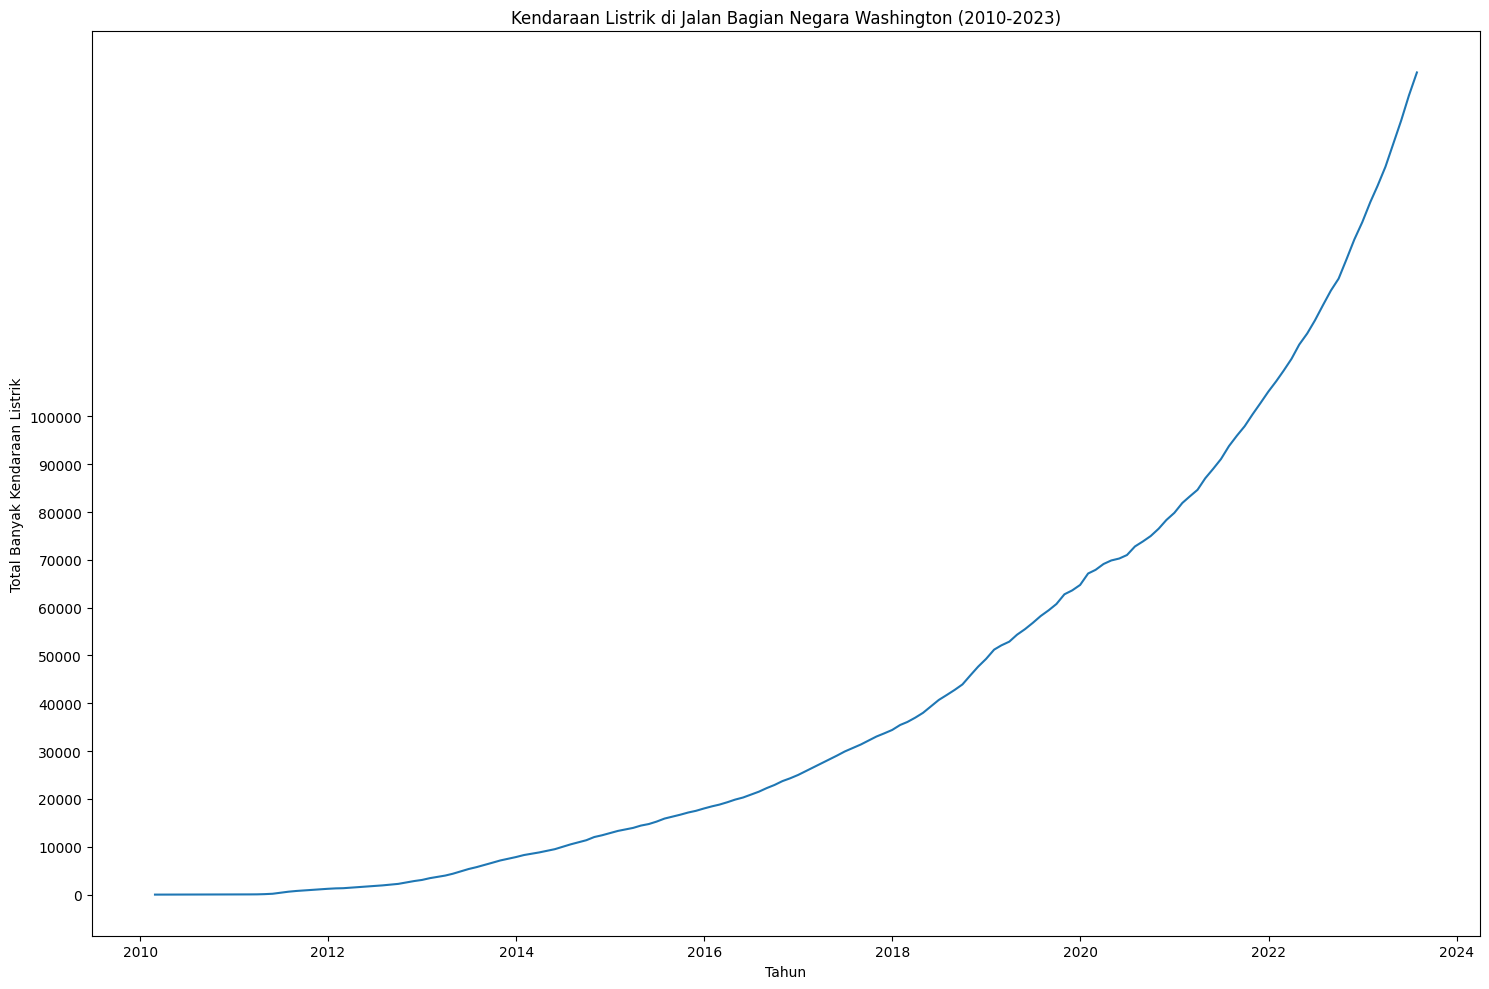

In [43]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='DOL Transaction Date', y='State Total', data=df_cumsum, ax=ax)
ax.set_xlabel('Tahun')
ax.set_ylabel('Total Banyak Kendaraan Listrik')
ax.set_title('Kendaraan Listrik di Jalan Bagian Negara Washington (2010-2023)')
ax.set_yticks(range(0,110000,10000))
plt.tight_layout()

Top 5 Pertumbuhan EV berdasarkan County

In [44]:
top_5 = df3['County'].value_counts().head(5)
top_5

King         420379
Snohomish     86410
Pierce        59125
Clark         43323
Kitsap        27363
Name: County, dtype: int64

In [45]:
top_five = ['King', 'Snohomish', 'Pierce', 'Clark', 'Kitsap']

In [46]:
# menyaring county untuk mempertahankan 10 besar
df_cumsum = df_cumsum.loc[:, ['DOL Transaction Date', *top_five]]
df_cumsum.head()

DOL Transaction Date  King  Snohomish  Pierce  Clark  Kitsap
0           2010-02-28   0.0        0.0     0.0    0.0       1
1           2010-03-31   1.0        0.0     0.0    1.0       1
2           2010-04-30   2.0        0.0     0.0    1.0       1
3           2010-05-31   2.0        1.0     0.0    1.0       1
4           2010-06-30   3.0        1.0     0.0    1.0       1

In [47]:
fig = px.line(df_cumsum, x='DOL Transaction Date', y=top_five,
              title='Jumlah Total Kendaraan Listrik berdasarkan Kabupaten')

fig.update_xaxes(title='Tahun')
fig.update_yaxes(title='Banyak Kendaraan Listrik')

fig.update_layout(height=900, width=1000)
fig.show()

#### Tren Pertumbuhan EV berdasarkan EV-Type

In [48]:
df1_clean['Electric_Vehicle_Type'].unique()

array(['PHEV', 'BEV'], dtype=object)

In [49]:
df1_clean_BEV =df1_clean[df1_clean['Electric_Vehicle_Type'] == 'BEV']

In [50]:
df1_clean_PHEV = df1_clean[df1_clean['Electric_Vehicle_Type'] == 'PHEV']

In [51]:
# Banyak register BEV berdasarkan tahun

growth_by_year_BEV = df1_clean_BEV['ModelYear'].value_counts(ascending = True).reset_index()
growth_by_year_BEV.columns = ['year','electric cars']
growth_by_year_BEV= growth_by_year_BEV.sort_values('year')

growth_by_year_BEV.head()

year  electric cars
0  1997              1
1  1998              1
4  1999              4
5  2000              9
3  2002              2

In [52]:
fig_line_electric = px.line(
    growth_by_year_BEV,
    x='year',
    y='electric cars',
    markers=True,
    title='Pertumbuhan Kendaraan Listrik Per Tahun',
    labels={'year': 'Tahun', 'electric cars': 'Mobil Listrik'},
)

fig_line_electric.show()

In [53]:
# Banyak register PHEV berdasarkan tahun
growth_by_year_PHEV = df1_clean_PHEV['ModelYear'].value_counts(ascending = True).reset_index()
growth_by_year_PHEV.columns = ['year','hyprid cars']
growth_by_year_PHEV= growth_by_year_PHEV.sort_values('year')

growth_by_year_PHEV.head()

year  hyprid cars
0  2010            3
1  2011           74
3  2012          857
5  2013         1640
8  2014         1792

In [54]:
fig_line_hybrid = px.line(
    growth_by_year_PHEV,
    x='year',
    y='hyprid cars',
    markers=True,
    title='Pertumbuhan Kendaraan Hybrid Per Tahun',
    labels={'year': 'Tahun', 'hybrid cars': 'Mobil Hybrid'},
)

fig_line_hybrid.show()

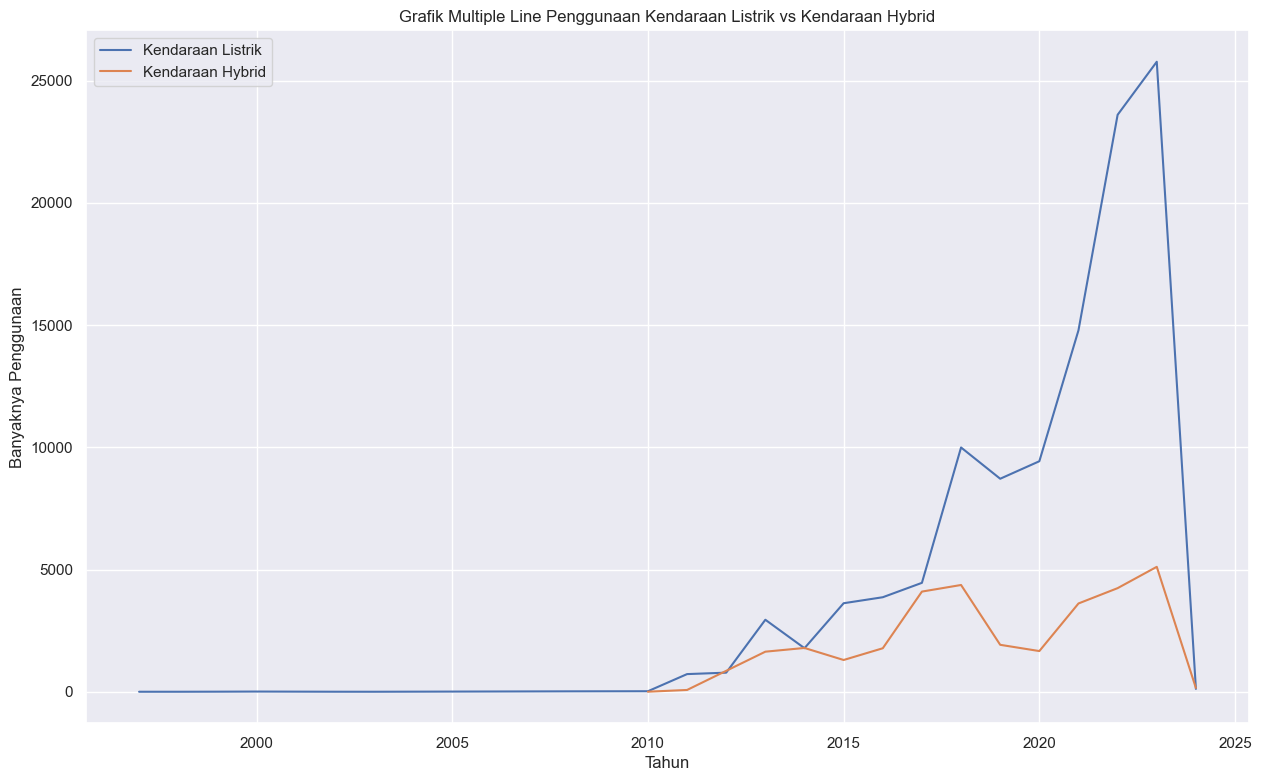

In [55]:


# Membuat plot
sns.set(style="darkgrid")

# Multiple line plot
plt.figure(figsize=(15, 9))
sns.lineplot(data=growth_by_year_BEV, x='year', y='electric cars', label='Kendaraan Listrik')
sns.lineplot(data=growth_by_year_PHEV, x='year', y='hyprid cars', label='Kendaraan Hybrid')

# Menambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Banyaknya Penggunaan')
plt.title('Grafik Multiple Line Penggunaan Kendaraan Listrik vs Kendaraan Hybrid')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [56]:
px.histogram(
    df1_clean['ModelYear'],
    color =df1_clean['Electric_Vehicle_Type'],
    labels=dict(value="Tahun", color="car type"),
    title = 'Pertumbuhan Kendaraan Listrik dan Hybrid dari Tahun ke Tahun',
    color_discrete_sequence=px.colors.qualitative.Pastel)

#### Rata-rata Electric Range berdasarkan EV Type

In [57]:
ER_df = df1_clean[['Electric_Vehicle_Type', 'Electric_Range']].copy()
ER_df.head()

Electric_Vehicle_Type  Electric_Range
0                  PHEV              30
1                  PHEV              38
2                   BEV             238
3                   BEV             208
4                  PHEV              19

In [58]:
ER_df.shape

(143266, 2)

In [59]:
(ER_df['Electric_Range']==0).sum()

63840

In [60]:
ER_df = ER_df[ER_df['Electric_Range'] != 0]
ER_df.head()

Electric_Vehicle_Type  Electric_Range
0                  PHEV              30
1                  PHEV              38
2                   BEV             238
3                   BEV             208
4                  PHEV              19

In [61]:
(ER_df['Electric_Range']==0).sum()

0

In [62]:
ER_df.shape

(79426, 2)

In [63]:
# Menghitung nilai rata-rata Electric Range untuk setiap EV type
average_range = ER_df.groupby('Electric_Vehicle_Type')['Electric_Range'].mean()

# Membuat diagram batang dengan plotly
fig = px.bar(x=average_range.values, y=average_range.index, color=average_range.index,
             labels={'x': 'Rata-rata Electric Range', 'y': 'EV Type Electric Vehicle'},
             title='Rata-rata Electric Range setiap EV Type')

fig.update_layout(xaxis=dict(categoryorder='total ascending'))
fig.update_traces(orientation='h')

fig.update_layout(height=600, width=800)
fig.show()

In [64]:
average_range

Electric_Vehicle_Type
BEV     194.372626
PHEV     30.641944
Name: Electric_Range, dtype: float64

#### Top 5 Kendaraan Listrik

In [65]:
top_cars = df1_clean['Make'].value_counts().nlargest(5)

fig = px.bar(x=top_cars.values, y=top_cars.index,
             labels={'x': 'Frekuensi', 'y': 'Merek Kendaraan listrik'},
             title='Top 5 Merek Kendaraan listrik')

fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.update_traces(orientation='h')

fig.update_layout(height=600, width=800)
fig.show()

#### Top Model

In [66]:
top_models = df1_clean['Model'].value_counts().nlargest(10)

fig = px.bar(x=top_models.values[::-1], y=top_models.index[::-1],
             labels={'x': 'Count', 'y': 'Electric Vehicle Model'},
             title='Top 10 Model Kendaraan Listrik',
             orientation='h')

fig.update_layout(height=600, width=800)
fig.show()

## Korelasi

#### Korelasi Data Numerik

In [67]:
df1_corr = df1_clean.copy()
df1_corr['Electric_Vehicle_Type'] = df1_corr['Electric_Vehicle_Type'].replace({'BEV': 0, 'PHEV': 1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15916\2833720538.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



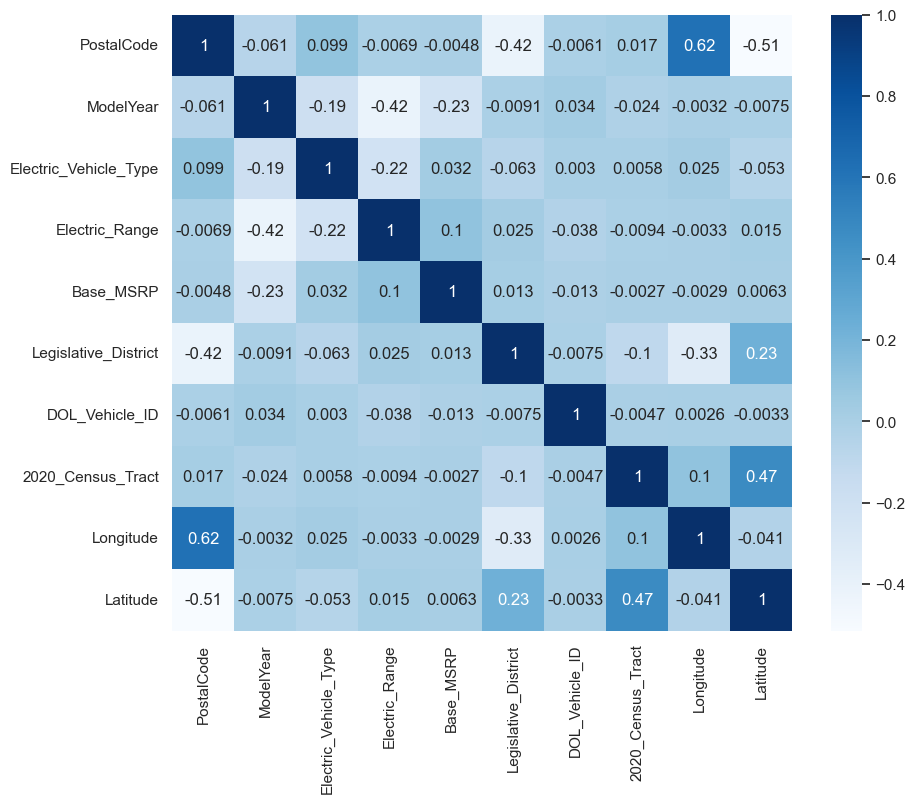

In [68]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df1_corr.corr(), annot=True, cmap='Blues')

plt.show()

Korelasi di atas menunjukkan bahwa tidak banyak fitur yang berkorelasi kuat secara linier dengan target. Artinya sebagian besar korelasi yang terdapat dalam dataset bersifat non-linier. Berdasarkan hal tersebut, model yang tepat digunakan adalah model yang memiliki performa baik pada dataset yang memiliki banyak korelasi non-linier seperti Decision Trees, Random Forests dan lainnya. Pada Project ini kami menggunakan Random Forest.

# 5. Modeling

In [69]:
train.head()

VIN  County   City  State  PostalCode  ModelYear  Make  Model  \
0   35   75383  24662      0     98177.0       2023     4   1994   
1    6     782     27      0     98936.0       2022    10    319   
2   25   75383  24662      0     98117.0       2018     6   5593   
3    5   75383    754      0     98059.0       2013    31   7523   
4   21    4725    977      0     98312.0       2015    10   1534   

   Electric_Vehicle_Type  CAFV_Eligibility  Electric_Range  Base_MSRP  \
0                      1                 0              30          0   
1                      1                 0              38          0   
2                      0                 0             238          0   
3                      0                 0             208      69900   
4                      1                 2              19          0   

   Legislative_District  DOL_Vehicle_ID  2020_Census_Tract  \
0                  36.0       218985539       5.303300e+10   
1                  15.0       197264322       5.307700e+10   
2                  36.0       168549727       5.303300e+10   
3                  41.0       244891062       5.303303e+10   
4                  26.0       134915000       5.303508e+10   

   Electric_Utility_Category   Longitude   Latitude  
0                      26145 -122.382425  47.772790  
1                      32768 -120.379512  46.556090  
2                      26145 -122.372760  47.689685  
3                      84353 -122.157340  47.487175  
4                      32768 -122.652230  47.571920

In [70]:
# Split Data
X = train.drop('Electric_Vehicle_Type', axis=1).values
y = train['Electric_Vehicle_Type'].values

# membagi data menjadi set data latih dan uji dengan ukuran uji 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [71]:
train['Electric_Vehicle_Type'].value_counts()

0    110651
1     32615
Name: Electric_Vehicle_Type, dtype: int64

Data target imbalance sehingga kita lakukan sampling

In [72]:
ns = NearMiss()

print("Original dataset shape:", Counter(y_train))
X_train_resampled, y_train_resampled = ns.fit_resample(X_train, y_train)
print("Resample dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({0: 77456, 1: 22830})
Resample dataset shape: Counter({0: 22830, 1: 22830})


In [73]:
# Lakukan standarisasi data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [74]:
# Tentukan model

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [75]:
y_pred = model.predict(X_test)

#5.1 Evaluasi Model Awal

In [76]:
# Hitung metrik evaluasi

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [77]:
# Tampilkan hasil dalam tabel

results = pd.DataFrame({
'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
'Score': [accuracy, precision, recall, f1]})

print("Confusion Matrix: \n", confusion)
print("\nEvaluation Metrics:")
display(results)

Confusion Matrix: 
 [[33145    50]
 [    1  9784]]

Evaluation Metrics:


Metrics     Score
0   Accuracy  0.998813
1  Precision  0.994916
2     Recall  0.999898
3   F1 Score  0.997400

#5.2 Hyperparameter Tuning

In [78]:
# Hyperparameter tuning menggunakan GridSearchCV

params = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10],
    'bootstrap': [True, False],
}
grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [79]:
# Hasil terbaik dari GridSearchCV

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [80]:
# Evaluasi model

y_pred_hyper = best_model.predict(X_test_scaled)

#5.3 Evaluasi Akhir

In [81]:
# Hitung metrik evaluasi

accuracy = accuracy_score(y_test, y_pred_hyper)
precision = precision_score(y_test, y_pred_hyper)
recall = recall_score(y_test, y_pred_hyper)
f1 = f1_score(y_test, y_pred_hyper)
confusion = confusion_matrix(y_test, y_pred_hyper)

In [82]:
# Tampilkan hasil dalam tabel
results = pd.DataFrame({
'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
'Score': [accuracy, precision, recall, f1]})

print("Best Parameters: ", best_params)
print("Confusion Matrix: \n", confusion)
print("\nEvaluation Metrics:")
display(results)

Best Parameters:  {'bootstrap': False, 'max_depth': None, 'n_estimators': 100}
Confusion Matrix: 
 [[33155    40]
 [    0  9785]]

Evaluation Metrics:


Metrics     Score
0   Accuracy  0.999069
1  Precision  0.995929
2     Recall  1.000000
3   F1 Score  0.997960

## Signifikan Fitur

In [83]:
X = train.drop('Electric_Vehicle_Type', axis=1)
y = train['Electric_Vehicle_Type']

In [84]:
X.columns

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'CAFV_Eligibility', 'Electric_Range', 'Base_MSRP',
       'Legislative_District', 'DOL_Vehicle_ID', '2020_Census_Tract',
       'Electric_Utility_Category', 'Longitude', 'Latitude'],
      dtype='object')

In [85]:
# mengambil nilai penting dan mengubah ke dataframe
importance = best_model.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': importance})\
                                    .sort_values(by='Importance', ascending=False)\
                                    .reset_index(drop=True)
feature_importance.head()

Feature  Importance
0    Electric_Range    0.439802
1             Model    0.184860
2  CAFV_Eligibility    0.182883
3              Make    0.070931
4               VIN    0.044944

# 6. Konklusi dan Rekomendasi

#### Konklusi

- Model Random Forest Terbaik mempunyai akurasi 0.99, yang berarti model mempunyai akurasi yang tinggi dalam memprediksi kelas.

- Kendaraan listrik dengan type BEV memiliki presentase lebih besar dari PHEV dalam data, yaitu sebesar 77,23%.

- Kendaraan listrik jenis BEV mempunyai rata-rata electric range lebih besar dibandingan jenis PHEV. Diperoleh nilai rata-rata EV range untuk BEV adalah 194,37 dan PHEV 30,64.

- Pertumbuhan kendaraan listrik cukup eksponensial dari tahun ketahun. Pertumbuhan paling signifikan ada di wilayah King.


#### Rekomendasi

- Pemahaman yang baik tentang perbedaan antara BEV dan PHEV membantu konsumen memilih kendaraan yang sesuai dengan kebutuhan mereka, termasuk pertimbangan terkait lingkungan, jangkauan perjalanan, dan efisiensi bahan bakar. Rekomendasi ini dapat memandu konsumen untuk membuat keputusan yang lebih bijak dalam pembelian kendaraan listrik.

- Pengembangan Infrastruktur yang Efisien. Mengetahui jenis kendaraan yang paling umum digunakan di suatu wilayah membantu dalam merencanakan dan mengembangkan infrastruktur pengisian daya yang sesuai. Ini memastikan bahwa sumber daya diarahkan secara efisien ke pengisian daya yang diperlukan oleh mayoritas pemilik kendaraan listrik di wilayah tersebut.

- Produsen mobil memerlukan pemahaman yang baik tentang tren dalam penjualan BEV dan PHEV untuk merencanakan produksi dan inovasi produk yang lebih efisien.

- PHEV memiliki emisi lebih tinggi ketika menggunakan mesin pembakaran internalnya. Oleh karena itu, pemahaman tentang seberapa banyak BEV dan PHEV yang beroperasi di jalan-jalan memungkinkan pengukuran dampak lingkungan yang lebih akurat dari penggunaan kendaraan listrik.
